# Natural Resilient eXplainable (NatuReX)

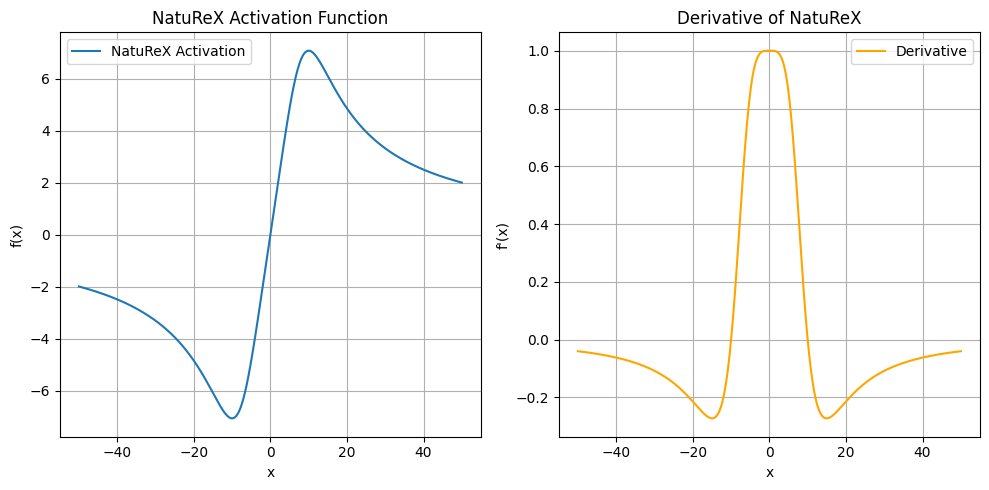

Input: [-20.  -1.   0.   1.  20. 100.]
NatuReX Output: [-4.850713   -0.99995005  0.          0.99995005  4.850713    0.99995005]
Gradient: [-0.21400203  0.9997501   1.          0.9997501  -0.21400203 -0.0099975 ]


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the NatuReX activation function
# f(x) = x / sqrt(1 + (x/A)^(2n))
def naturEx(x, A=10.0, n=2.0):
    return x / tf.sqrt(1.0 + (x / A)**(2.0 * n))

# For visualization, let's define a numpy version of the function
def naturEx_np(x, A=10.0, n=2.0):
    return x / np.sqrt(1.0 + (x / A)**(2.0 * n))

# Also define the derivative for visualization purposes
def naturEx_prime_np(x, A=10.0, n=2.0):
    # f'(x) = derivative of (x / sqrt(1+(x/A)^{2n}))
    # Let's derive:
    # f(x) = x / sqrt(1 + (x/A)^{2n})
    # Let u = (x/A)^{2n}, so f(x) = x / sqrt(1 + u)
    # df/dx = (1 * sqrt(1+u) - x * (1/(2*sqrt(1+u))) * d(1+u)/dx ) / (1+u)
    # Actually, let's do direct differentiation more cleanly:
    #
    # f(x) = x * (1 + (x/A)^{2n})^{-1/2}
    #
    # df/dx = (1)*(1 + (x/A)^{2n})^{-1/2} + x * (-1/2)*(1 + (x/A)^{2n})^{-3/2} * (2n)*(x/A)^{2n-1}*(1/A)
    #
    # Simplify step by step:
    # df/dx = (1 + (x/A)^{2n})^{-1/2} 
    #         - x*(n)*(x/A)^{2n-1}*(1/A)*(1 + (x/A)^{2n})^{-3/2}
    #
    # For clarity in code, we just compute numerically:
    A = float(A)
    n = float(n)
    denom = np.sqrt(1.0 + (x/A)**(2.0 * n))
    # first part: (1 + (x/A)^{2n})^{-1/2}
    term1 = 1.0 / denom
    # second part:
    # x*(n)*(x/A)^{2n-1}*(1/A)*(1 + (x/A)^{2n})^{-3/2}
    # (x/A)^{2n-1} = (x^{2n-1})/(A^{2n-1})
    # Combine terms:
    numerator = x * n * (x**(2*n - 1)) / (A**(2*n - 1)) * (1/A)
    # numerator = x * n * x^{2n-1}/A^{2n} = n*x^{2n}/A^{2n}
    # so numerator = n*(x^{2n})/(A^{2n})
    numerator = n * (x**(2*n)) / (A**(2*n))
    # second term full:
    term2 = numerator * (1.0 / ((1.0 + (x/A)**(2.0 * n))**(3.0/2.0)))

    # df/dx = term1 - term2
    return term1 - term2

# Let's pick a range of x values:
x_values = np.linspace(-50, 50, 400)
A = 10.0
n = 2.0

y_values = naturEx_np(x_values, A, n)
dy_values = naturEx_prime_np(x_values, A, n)

# Plot the activation function
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(x_values, y_values, label='NatuReX Activation')
plt.title('NatuReX Activation Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

# Plot its derivative
plt.subplot(1,2,2)
plt.plot(x_values, dy_values, color='orange', label='Derivative')
plt.title('Derivative of NatuReX')
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Demonstration with TensorFlow:
# Create a sample tensor and apply the custom activation
sample_data = tf.constant([-20.0, -1.0, 0.0, 1.0, 20.0, 100.0], dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(sample_data)
    output = naturEx(sample_data, A=A, n=n)

grad = tape.gradient(output, sample_data)

print("Input:", sample_data.numpy())
print("NatuReX Output:", output.numpy())
print("Gradient:", grad.numpy())
